     date  count  month  day   datetime   z_score   p_value  significativo
0    0101   1482      1    1 1900-01-01  4.631623  0.000004           True
1    0102   1213      1    2 1900-01-02 -2.798505  0.005134           True
2    0103   1220      1    3 1900-01-03 -2.605156  0.009183           True
3    0104   1319      1    4 1900-01-04  0.129352  0.897079          False
4    0105   1262      1    5 1900-01-05 -1.445062  0.148441          False
..    ...    ...    ...  ...        ...       ...       ...            ...
361  1227   1256     12   27 1900-12-27 -1.610789  0.107226          False
362  1228   1426     12   28 1900-12-28  3.084831  0.002037           True
363  1229   1332     12   29 1900-12-29  0.488429  0.625246          False
364  1230   1355     12   30 1900-12-30  1.123719  0.261132          False
365  1231   1352     12   31 1900-12-31  1.040855  0.297943          False

[366 rows x 8 columns]


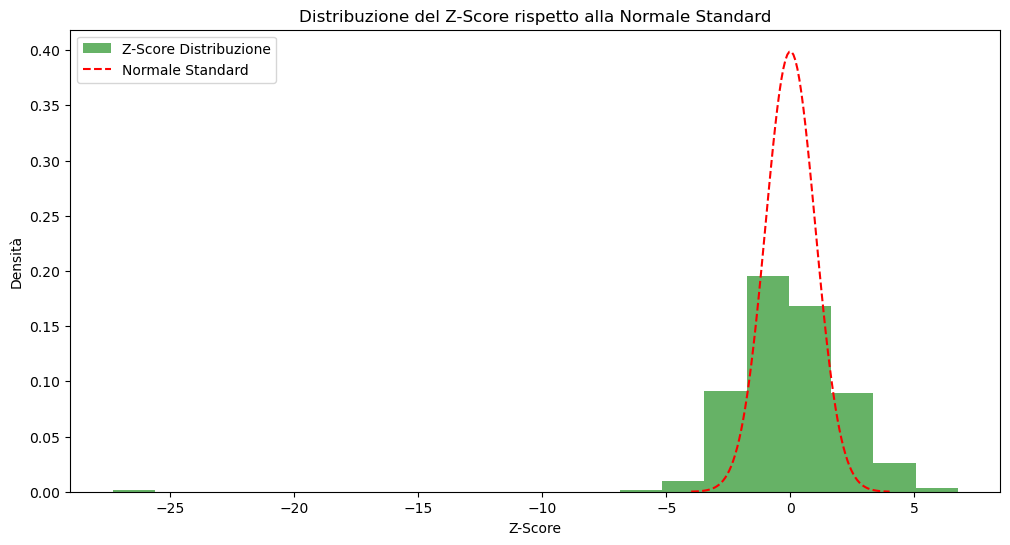

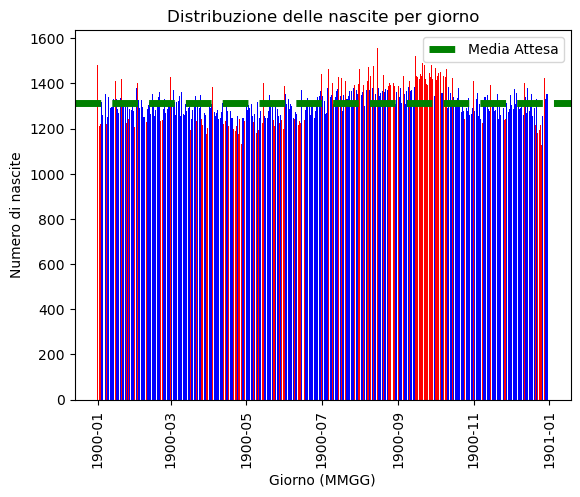

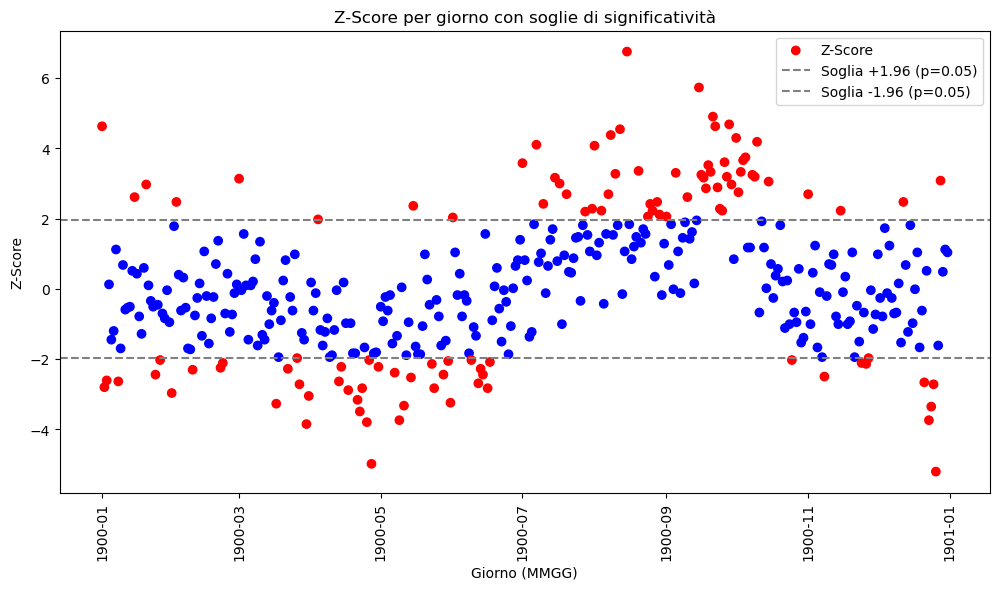

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Caricamento dei dati dal file ../data/birthdays.dat
file_path = '../data/birthdays.dat'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'count'], dtype={'date': str})

# Aggiungi colonne per mese e giorno
df['month'] = df['date'].str[:2].astype(int)
df['day'] = df['date'].str[2:].astype(int)

# Creazione della colonna datetime (asse x) e gestione di eventuali valori non validi
df['datetime'] = pd.to_datetime(df['date'], format='%m%d', errors='coerce')

# Numero totale di giorni considerati
num_days = len(df)

# Numero totale di nascite
total_births = df['count'].sum()

# Numero atteso di nascite per giorno (se distribuite uniformemente)
expected_births_per_day = total_births / num_days

# Calcola la deviazione standard (assunzione di distribuzione binomiale)
p = 1 / num_days
sigma = np.sqrt(p * (1 - p) * total_births)

# Calcola il valore Z per ogni giorno
df['z_score'] = (df['count'] - expected_births_per_day) / sigma

# Calcola il p-value per ogni giorno
df['p_value'] = 2 * (1 - norm.cdf(np.abs(df['z_score'])))

# Verifica quali giorni hanno una distribuzione significativamente diversa
alpha = 0.05
df['significativo'] = df['p_value'] < alpha

# Stampa i risultati
print(df)

# 1. Plot della distribuzione Z confrontata con una normale standard
plt.figure(figsize=(12, 6))
z_values = df['z_score']
x = np.linspace(-4, 4, 100)
plt.hist(z_values, bins=20, density=True, alpha=0.6, color='g', label='Z-Score Distribuzione')
plt.plot(x, norm.pdf(x), 'r--', label='Normale Standard')
plt.xlabel('Z-Score')
plt.ylabel('Densità')
plt.title('Distribuzione del Z-Score rispetto alla Normale Standard')
plt.legend()
plt.show()

# Traccia un grafico a barre per visualizzare i dati
plt.bar(df['datetime'], df['count'], color=df['significativo'].map({True: 'red', False: 'blue'}))
plt.xlabel('Giorno (MMGG)')
plt.ylabel('Numero di nascite')
plt.title('Distribuzione delle nascite per giorno')
plt.xticks(rotation=90)
plt.axhline(y=expected_births_per_day, color='green', linestyle='--', label='Media Attesa', lw=5)
plt.legend()
plt.show()

# 2. Grafico Z-Score con soglie di significatività
plt.figure(figsize=(12, 6))
plt.scatter(df['datetime'], df['z_score'], c=df['significativo'].map({True: 'red', False: 'blue'}), label='Z-Score')
plt.axhline(y=1.96, color='gray', linestyle='--', label='Soglia +1.96 (p=0.05)')
plt.axhline(y=-1.96, color='gray', linestyle='--', label='Soglia -1.96 (p=0.05)')
plt.xlabel('Giorno (MMGG)')
plt.ylabel('Z-Score')
plt.title('Z-Score per giorno con soglie di significatività')
plt.legend()
plt.xticks(rotation=90)
plt.show()


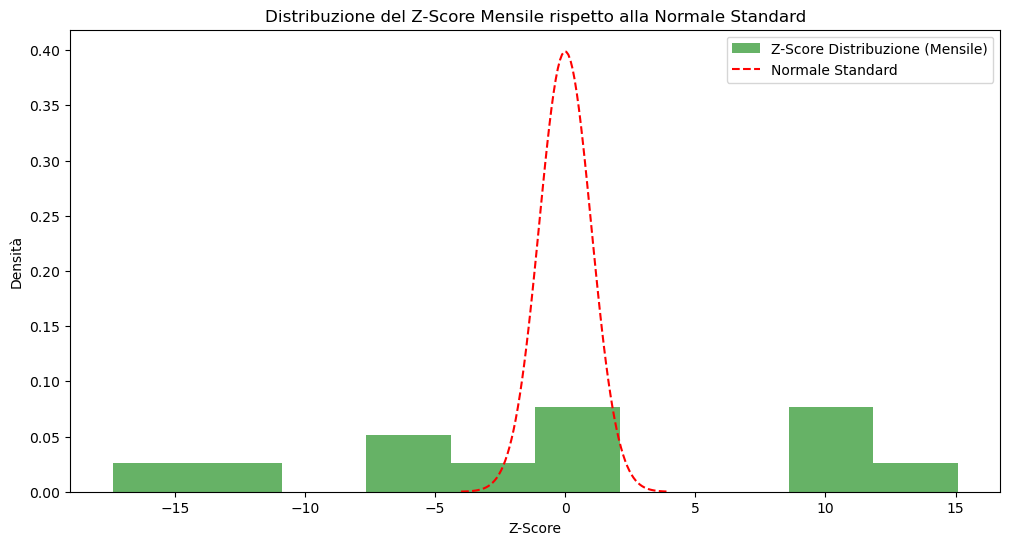

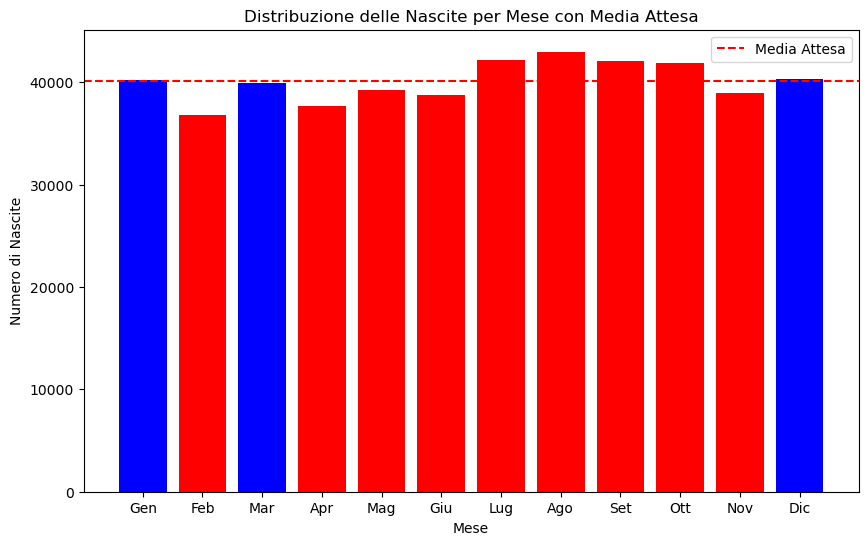

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Caricamento dei dati dal file ../data/birthdays.dat
file_path = '../data/birthdays.dat'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'count'], dtype={'date': str})

# Aggiungi colonne per mese e giorno
df['month'] = df['date'].str[:2].astype(int)
df['day'] = df['date'].str[2:].astype(int)

# Aggrega i dati per mese
df_monthly = df.groupby('month')['count'].sum().reset_index()

# Numero totale di mesi
num_months = 12

# Numero totale di nascite
total_births = df_monthly['count'].sum()

# Numero atteso di nascite per mese (se distribuite uniformemente)
expected_births_per_month = total_births / num_months

# Calcola la deviazione standard
p = 1 / num_months
sigma = np.sqrt(p * (1 - p) * total_births)

# Calcola il valore Z per ogni mese
df_monthly['z_score'] = (df_monthly['count'] - expected_births_per_month) / sigma

# Calcola il p-value per ogni mese
df_monthly['p_value'] = 2 * (1 - norm.cdf(np.abs(df_monthly['z_score'])))

# Verifica quali mesi hanno una distribuzione significativamente diversa
alpha = 0.05
df_monthly['significativo'] = df_monthly['p_value'] < alpha

# 1. Plot della distribuzione Z confrontata con una normale standard
plt.figure(figsize=(12, 6))
z_values = df_monthly['z_score']
x = np.linspace(-4, 4, 100)
plt.hist(z_values, bins=10, density=True, alpha=0.6, color='g', label='Z-Score Distribuzione (Mensile)')
plt.plot(x, norm.pdf(x), 'r--', label='Normale Standard')
plt.xlabel('Z-Score')
plt.ylabel('Densità')
plt.title('Distribuzione del Z-Score Mensile rispetto alla Normale Standard')
plt.legend()
plt.show()

# 2. Plot della distribuzione delle nascite per mese con linea media attesa
plt.figure(figsize=(10, 6))
months = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']
plt.bar(months, df_monthly['count'], color=df_monthly['significativo'].map({True: 'red', False: 'blue'}))
plt.axhline(y=expected_births_per_month, color='red', linestyle='--', label='Media Attesa')
plt.xlabel('Mese')
plt.ylabel('Numero di Nascite')
plt.title('Distribuzione delle Nascite per Mese con Media Attesa')
plt.legend()
plt.show()


    month  count   datetime  days_in_month    z_score       p_value  \
0       1  40255 1900-01-01             31   0.878141  3.798670e-01   
1       2  36753 1900-02-01             28 -17.390677  0.000000e+00   
2       3  39940 1900-03-01             31  -0.765113  4.442041e-01   
3       4  37641 1900-04-01             30 -12.758264  0.000000e+00   
4       5  39288 1900-05-01             31  -4.166389  3.094618e-05   
5       6  38789 1900-06-01             30  -6.769513  1.292166e-11   
6       7  42148 1900-07-01             31  10.753319  0.000000e+00   
7       8  42980 1900-08-01             31  15.093598  0.000000e+00   
8       9  42112 1900-09-01             30  10.565519  0.000000e+00   
9      10  41874 1900-10-01             31   9.323948  0.000000e+00   
10     11  38940 1900-11-01             30  -5.981795  2.206925e-09   
11     12  40320 1900-12-01             31   1.217226  2.235184e-01   

    significativo  
0           False  
1            True  
2           Fals

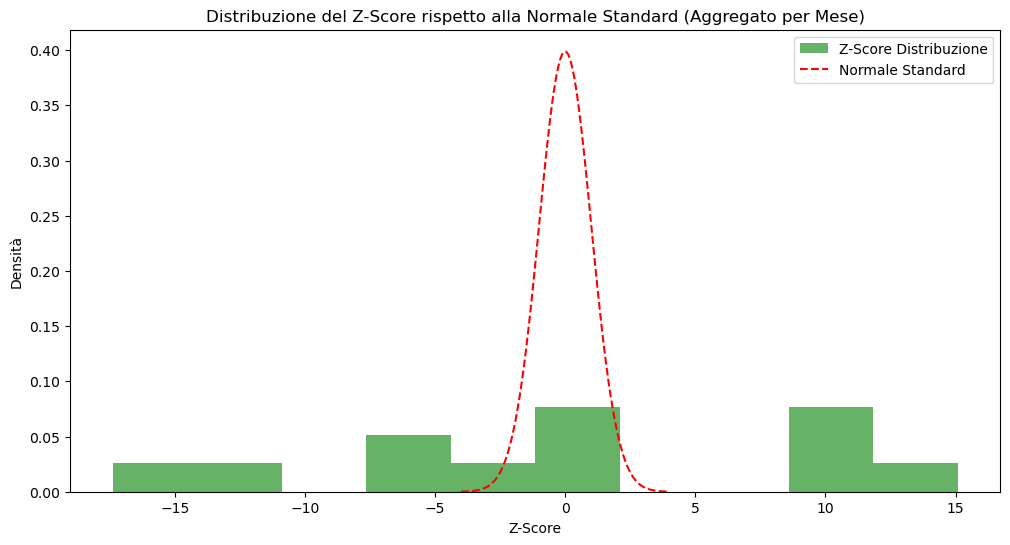

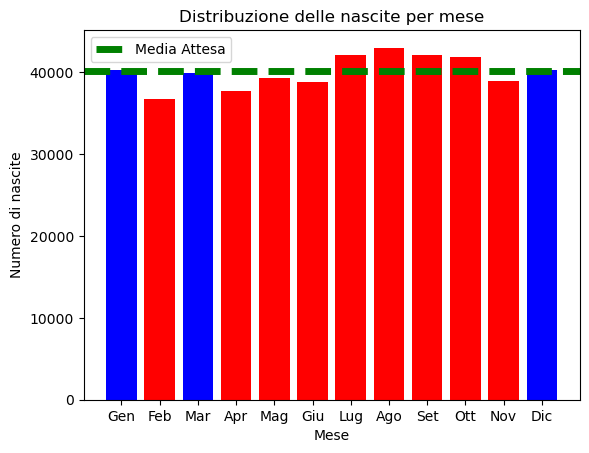

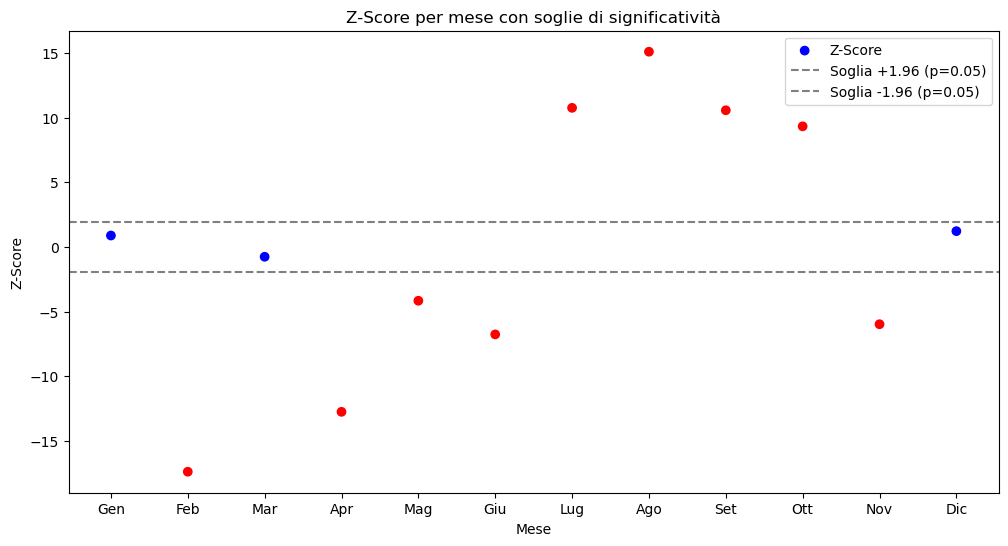

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Caricamento dei dati dal file ../data/birthdays.dat
file_path = '../data/birthdays.dat'
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['date', 'count'], dtype={'date': str})

# Aggiungi colonne per mese e giorno
df['month'] = df['date'].str[:2].astype(int)
df['day'] = df['date'].str[2:].astype(int)

# Creazione della colonna datetime e gestione di eventuali valori non validi
df['datetime'] = pd.to_datetime(df['date'], format='%m%d', errors='coerce')

# Aggregazione dei dati per mese
monthly_data = df.groupby('month').agg({'count': 'sum', 'datetime': 'first'}).reset_index()
monthly_data['days_in_month'] = monthly_data['datetime'].dt.days_in_month

# Numero totale di giorni considerati
num_months = len(monthly_data)

# Numero totale di nascite
total_births = monthly_data['count'].sum()

# Numero atteso di nascite per mese (se distribuite uniformemente)
expected_births_per_month = total_births / num_months

# Calcola la deviazione standard per mese (assunzione di distribuzione binomiale)
p = 1 / num_months
sigma = np.sqrt(p * (1 - p) * total_births)

# Calcola il valore Z per ogni mese
monthly_data['z_score'] = (monthly_data['count'] - expected_births_per_month) / sigma

# Calcola il p-value per ogni mese
monthly_data['p_value'] = 2 * (1 - norm.cdf(np.abs(monthly_data['z_score'])))

# Verifica quali mesi hanno una distribuzione significativamente diversa
alpha = 0.05
monthly_data['significativo'] = monthly_data['p_value'] < alpha

# Stampa i risultati
print(monthly_data)

# 1. Plot della distribuzione Z confrontata con una normale standard
plt.figure(figsize=(12, 6))
z_values = monthly_data['z_score']
x = np.linspace(-4, 4, 100)
plt.hist(z_values, bins=10, density=True, alpha=0.6, color='g', label='Z-Score Distribuzione')
plt.plot(x, norm.pdf(x), 'r--', label='Normale Standard')
plt.xlabel('Z-Score')
plt.ylabel('Densità')
plt.title('Distribuzione del Z-Score rispetto alla Normale Standard (Aggregato per Mese)')
plt.legend()
plt.show()

# Traccia un grafico a barre per visualizzare i dati aggregati mensili
plt.bar(monthly_data['month'], monthly_data['count'], color=monthly_data['significativo'].map({True: 'red', False: 'blue'}))
plt.xlabel('Mese')
plt.ylabel('Numero di nascite')
plt.title('Distribuzione delle nascite per mese')
plt.xticks(ticks=range(1, 13), labels=['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
plt.axhline(y=expected_births_per_month, color='green', linestyle='--', label='Media Attesa', lw=5)
plt.legend()
plt.show()

# 2. Grafico Z-Score con soglie di significatività
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['month'], monthly_data['z_score'], c=monthly_data['significativo'].map({True: 'red', False: 'blue'}), label='Z-Score')
plt.axhline(y=1.96, color='gray', linestyle='--', label='Soglia +1.96 (p=0.05)')
plt.axhline(y=-1.96, color='gray', linestyle='--', label='Soglia -1.96 (p=0.05)')
plt.xlabel('Mese')
plt.ylabel('Z-Score')
plt.title('Z-Score per mese con soglie di significatività')
plt.legend()
plt.xticks(ticks=range(1, 13), labels=['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
plt.show()
